In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime

import matplotlib.cm as cm
from sklearn.cluster import KMeans, DBSCAN
from sklearn.manifold import TSNE
from sklearn import preprocessing
from sklearn.decomposition import PCA

import statsmodels.api as sm
import statsmodels.tsa.stattools as ts

In [2]:
stock_price = pd.read_csv("./stock_price_table.csv", index_col = 0)
stock_price.columns = stock_price.columns.str.lstrip('price_')
stock_price.head()

,20070103,20070104,20070105,20070108,20070109,20070110,20070111,20070112,20070116,20070117,...,20151217,20151218,20151221,20151222,20151223,20151224,20151228,20151229,20151230,20151231
PERMNO,,,,,,,,,,,,,,,,,,,,,
10025,49.06,50.34,49.63,49.50,50.62,49.68,49.20,48.90,46.83,47.05,...,80.80,79.01,76.40,77.93,78.98,80.55,78.97,77.15,77.22,77.15
10026,41.02,41.89,39.66,40.42,40.54,41.54,41.41,42.23,41.71,41.28,...,114.37,112.69,112.92,114.53,115.90,118.21,117.64,119.37,119.25,116.67
10032,24.12,24.30,23.89,23.70,23.13,20.90,20.84,21.58,20.79,20.58,...,35.26,34.99,35.22,35.08,35.95,36.05,35.67,35.92,35.46,34.92
10051,7.40,7.33,7.52,7.44,7.51,7.52,7.45,7.60,7.83,7.82,...,17.53,16.77,16.52,17.08,17.29,17.38,16.96,16.95,16.85,16.45
10104,17.51,17.68,17.64,17.86,17.82,17.77,17.39,17.50,17.30,17.52,...,36.93,36.35,36.42,36.59,36.93,37.01,36.79,37.04,36.92,36.53


In [3]:
df_ret = stock_price.T.pct_change().T

In [4]:
df_ret = df_ret.drop(['20070103'], axis = 1)
df_ret.head()

,20070104,20070105,20070108,20070109,20070110,20070111,20070112,20070116,20070117,20070118,...,20151217,20151218,20151221,20151222,20151223,20151224,20151228,20151229,20151230,20151231
PERMNO,,,,,,,,,,,,,,,,,,,,,
10025,0.026091,-0.014104,-0.002619,0.022626,-0.018570,-0.009662,-0.006098,-0.042331,0.004698,-0.015515,...,-0.023447,-0.022153,-0.033034,0.020026,0.013474,0.019878,-0.019615,-0.023047,0.000907,-0.000907
10026,0.021209,-0.053235,0.019163,0.002969,0.024667,-0.003130,0.019802,-0.012314,-0.010309,0.035368,...,-0.011410,-0.014689,0.002041,0.014258,0.011962,0.019931,-0.004822,0.014706,-0.001005,-0.021635
10032,0.007463,-0.016872,-0.007953,-0.024051,-0.096412,-0.002871,0.035509,-0.036608,-0.010101,-0.029640,...,-0.008715,-0.007657,0.006573,-0.003975,0.024800,0.002782,-0.010541,0.007009,-0.012806,-0.015228
10051,-0.009459,0.025921,-0.010638,0.009409,0.001332,-0.009309,0.020134,0.030263,-0.001277,-0.007673,...,0.021562,-0.043354,-0.014908,0.033898,0.012295,0.005205,-0.024166,-0.000590,-0.005900,-0.023739
10104,0.009709,-0.002262,0.012472,-0.002240,-0.002806,-0.021384,0.006325,-0.011429,0.012717,-0.022831,...,-0.050887,-0.015705,0.001926,0.004668,0.009292,0.002166,-0.005944,0.006795,-0.003240,-0.010563


In [5]:
df_ret = df_ret.dropna()
df_ret.shape

(1844, 2265)

In [6]:
N_PRIN_COMPONENTS = 50
pca1 = PCA(n_components = N_PRIN_COMPONENTS)
pca1.fit(df_ret.T)

PCA(copy=True, iterated_power='auto', n_components=50, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [7]:
pca1.components_.T.shape

(1844, 50)

In [8]:
reduced_price = pd.DataFrame(data = pca1.components_.T, index = df_ret.index)
reduced_price = reduced_price.add_prefix("P")
reduced_price.head()

,P0,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P40,P41,P42,P43,P44,P45,P46,P47,P48,P49
PERMNO,,,,,,,,,,,,,,,,,,,,,
10025,-7.041245e-06,0.000046,-0.000303,0.000039,-0.000300,-0.019665,-0.002949,-0.002234,-0.002038,-0.002076,...,0.020470,0.002165,0.005982,-0.010698,-0.004696,-0.000395,-0.005876,-0.000555,-0.001818,0.001932
10026,4.427555e-06,0.000023,0.000025,0.000026,-0.000688,-0.014536,-0.002125,-0.001593,-0.000116,-0.001248,...,0.018255,0.003080,0.002239,-0.016006,-0.004876,-0.009084,-0.006892,0.010538,0.008486,0.001703
10032,1.497997e-06,0.000004,0.000100,0.000445,-0.000188,-0.024523,-0.004029,-0.001560,-0.000696,-0.001293,...,0.005131,0.004621,0.006774,-0.012999,-0.008134,0.002124,-0.003082,0.001663,-0.008780,0.007972
10051,2.064578e-06,-0.000026,0.000075,0.000041,-0.000098,-0.016408,-0.002557,-0.001023,0.000285,-0.001370,...,0.018133,0.003584,0.003531,-0.013765,0.004478,-0.006016,-0.009898,0.013815,-0.001942,0.002235
10104,-3.226356e-09,-0.000033,0.000090,0.000033,-0.000081,-0.016637,-0.001754,-0.002269,-0.000717,-0.000822,...,0.003248,0.000220,0.001649,-0.010262,-0.002209,-0.008137,-0.005212,0.005831,-0.000940,-0.002603


In [9]:
ratios_data = pd.read_csv("./ratios_data_table.csv", index_col = 0)
ratios_data = ratios_data.dropna()
ratios_data.head()

,bm,pe_exi,npm,cfm,roa,roe,GProf,totdebt_invcap,capital_ratio,debt_ebitda,lt_debt,cash_debt,fcf_ocf,de_ratio,at_turn,ptb
permno,,,,,,,,,,,,,,,,
10025,0.273,13.679,0.025,0.054,0.210,0.308,0.484,0.710,0.702,2.296,0.602,0.201,0.827,3.910,2.573,3.534
10026,0.303,31.279,0.072,0.111,0.205,0.112,0.456,0.002,0.002,0.010,0.008,0.736,0.524,0.238,1.349,3.385
10032,0.659,12.745,0.036,0.054,0.100,0.115,0.169,0.239,0.235,1.588,0.301,0.089,0.542,1.021,1.603,1.364
10051,0.981,-548.330,-0.001,0.037,0.058,-0.002,0.058,0.553,0.524,7.474,0.658,0.061,0.373,1.675,0.834,1.216
10104,0.297,17.070,0.250,0.326,0.164,0.198,0.298,0.443,0.427,2.221,0.635,0.232,0.878,1.173,0.365,3.259


In [10]:
ratios_data.shape

(1591, 16)

In [11]:
N_PRIN_COMPONENTS = 5
pca2 = PCA(n_components = N_PRIN_COMPONENTS)
pca2.fit(ratios_data.T)

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [12]:
pca2.components_.T.shape

(1591, 5)

In [13]:
reduced_ratio = pd.DataFrame(data = pca2.components_.T, index = ratios_data.index)
reduced_ratio = reduced_ratio.add_prefix("R")
reduced_ratio.head()

,R0,R1,R2,R3,R4
permno,,,,,
10025,0.004255,0.001993,0.003868,0.011551,0.002283
10026,0.010518,0.000616,-0.000830,0.011540,0.001873
10032,0.004160,0.000587,0.002900,0.003658,0.001659
10051,-0.187424,-0.012295,0.015351,0.031220,0.002623
10104,0.005573,0.000688,0.004190,0.010696,0.004456


In [14]:
X = reduced_price.join(reduced_ratio)
X.head()

,P0,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P45,P46,P47,P48,P49,R0,R1,R2,R3,R4
PERMNO,,,,,,,,,,,,,,,,,,,,,
10025,-7.041245e-06,0.000046,-0.000303,0.000039,-0.000300,-0.019665,-0.002949,-0.002234,-0.002038,-0.002076,...,-0.000395,-0.005876,-0.000555,-0.001818,0.001932,0.004255,0.001993,0.003868,0.011551,0.002283
10026,4.427555e-06,0.000023,0.000025,0.000026,-0.000688,-0.014536,-0.002125,-0.001593,-0.000116,-0.001248,...,-0.009084,-0.006892,0.010538,0.008486,0.001703,0.010518,0.000616,-0.000830,0.011540,0.001873
10032,1.497997e-06,0.000004,0.000100,0.000445,-0.000188,-0.024523,-0.004029,-0.001560,-0.000696,-0.001293,...,0.002124,-0.003082,0.001663,-0.008780,0.007972,0.004160,0.000587,0.002900,0.003658,0.001659
10051,2.064578e-06,-0.000026,0.000075,0.000041,-0.000098,-0.016408,-0.002557,-0.001023,0.000285,-0.001370,...,-0.006016,-0.009898,0.013815,-0.001942,0.002235,-0.187424,-0.012295,0.015351,0.031220,0.002623
10104,-3.226356e-09,-0.000033,0.000090,0.000033,-0.000081,-0.016637,-0.001754,-0.002269,-0.000717,-0.000822,...,-0.008137,-0.005212,0.005831,-0.000940,-0.002603,0.005573,0.000688,0.004190,0.010696,0.004456


In [15]:
X = X.dropna()
X.shape

(1422, 55)

In [16]:
train_data = preprocessing.StandardScaler().fit_transform(X)
print(train_data.shape)

(1422, 55)


In [17]:
print(train_data)

[[-2.68189042e-02  5.05255072e-01 -4.05057019e-02 ... -5.79047669e-02
   9.18513554e-04  1.25839210e-01]
 [-2.63862700e-02  9.28431067e-02 -2.81281962e-02 ... -3.05562821e-01
   4.07150933e-04  7.68978780e-02]
 [-2.64967809e-02 -2.54825040e-01 -2.52700874e-02 ... -1.08927832e-01
  -3.63975765e-01  5.14339630e-02]
 ...
 [-2.65967156e-02  6.69576939e-01 -4.07134351e-02 ...  7.81595041e-02
   1.89167487e-01 -5.24112815e-01]
 [-2.64628181e-02 -1.42167716e-01 -2.93172311e-02 ... -4.42252846e-02
  -3.66556508e-01  4.73584996e-01]
 [-2.65576369e-02 -5.52023172e-01 -2.56776756e-02 ... -1.11520804e-01
  -6.65283252e-02  3.14740310e-01]]


In [18]:
clf = DBSCAN(eps=1.8, min_samples = 3, n_jobs = 1)
print(clf)

DBSCAN(algorithm='auto', eps=1.8, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=3, n_jobs=1, p=None)


In [19]:
clf.fit(train_data)
labels = clf.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print("Clusters discovered: %d" % n_clusters_)

Clusters discovered: 11


In [20]:
clustered = clf.labels_
clustered_series = pd.Series(index = X.index, data = clustered.flatten())
clustered_series_all = pd.Series(index = X.index, data = clustered.flatten())
clustered_series = clustered_series[clustered_series != 1]

In [21]:
cluster_size_limit = 100
counts = clustered_series.value_counts()
ticker_count_reduced = counts[(counts > 1) & (counts <= cluster_size_limit)]
print("Clusters formed: %d" % len(ticker_count_reduced))
print("Pairs to evaluate: %d" % (ticker_count_reduced*(ticker_count_reduced-1)).sum())

Clusters formed: 9
Pairs to evaluate: 162


In [22]:
#plot multidimension to 2d
X_tsne = TSNE(learning_rate = 1000, perplexity = 25, random_state = 1337).fit_transform(X)

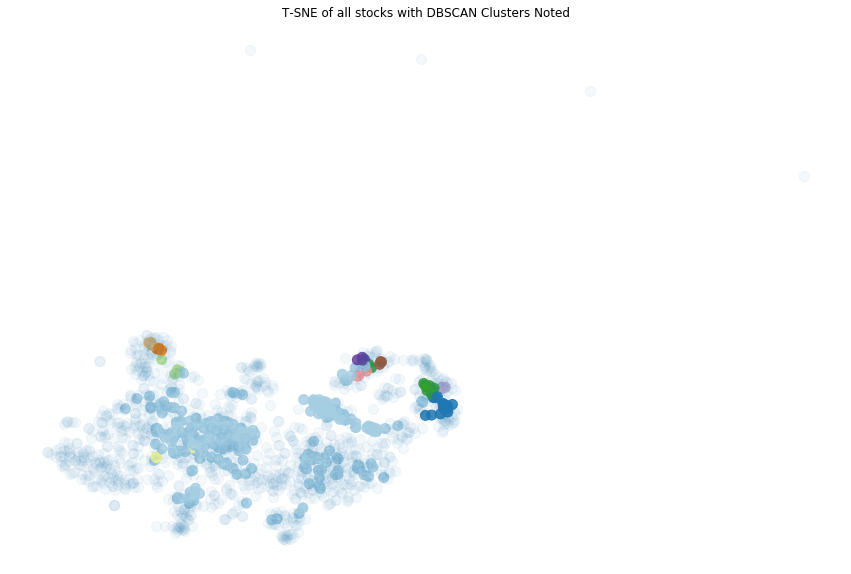

In [23]:
plt.figure(1, facecolor = 'white', figsize = (15, 10))
plt.clf()
plt.axis('off')

plt.scatter(X_tsne[(labels!=-1), 0], X_tsne[(labels!=-1), 1], s = 100, alpha = 0.85, c = labels[labels!=-1], cmap = cm.Paired)
plt.scatter(X_tsne[(clustered_series_all==-1).values, 0], X_tsne[(clustered_series_all==-1).values, 1], s = 100, alpha = 0.05)
plt.title('T-SNE of all stocks with DBSCAN Clusters Noted')
plt.savefig('T-SNE_plot_for_stock_clusters.png')
plt.show()

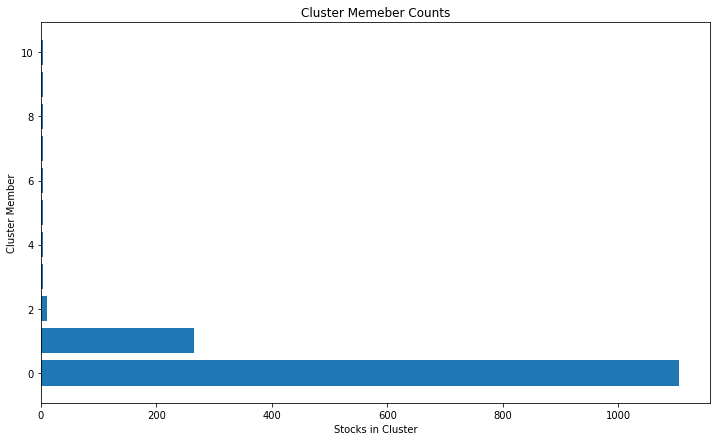

In [24]:
plt.figure(figsize = (12, 7))
plt.barh(range(len(clustered_series.value_counts())), clustered_series.value_counts())
plt.title("Cluster Memeber Counts")
plt.xlabel('Stocks in Cluster')
plt.ylabel("Cluster Member")
plt.savefig('cluster_member_counts.png')
plt.show()

In [25]:
counts = clustered_series.value_counts()
clusters_viz_list = list(counts[(counts < 500) & (counts > 1)].index)[::-1]
print(clusters_viz_list)

[4, 7, 9, 10, 2, 5, 6, 8, 3, 0]


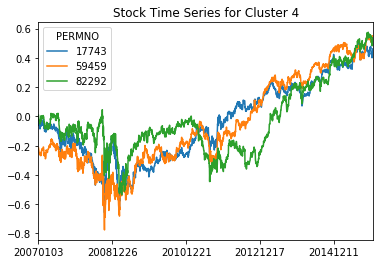

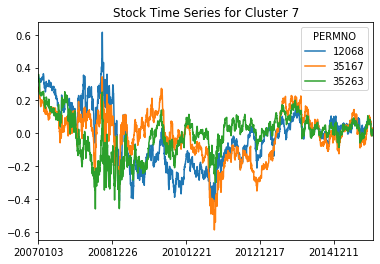

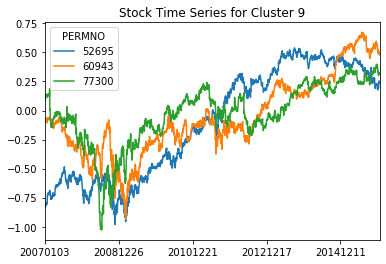

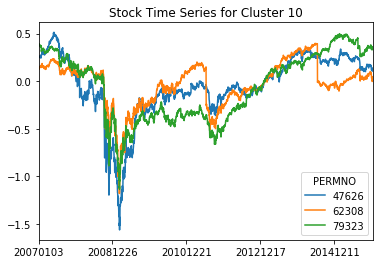

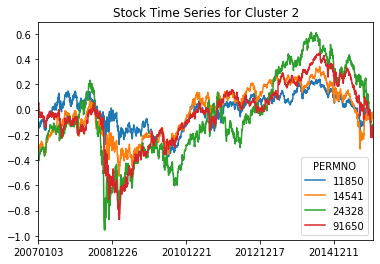

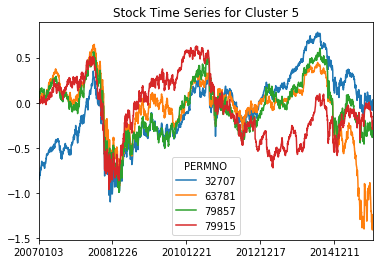

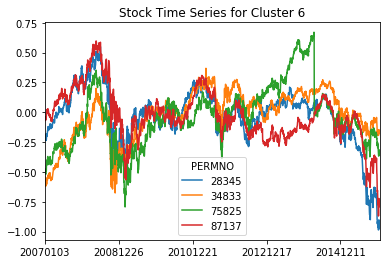

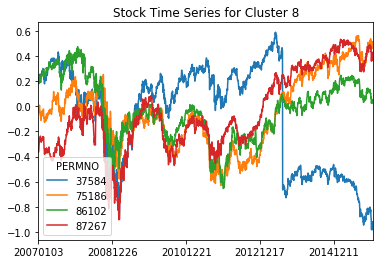

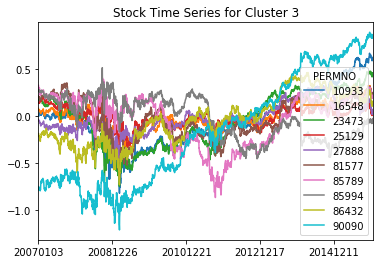

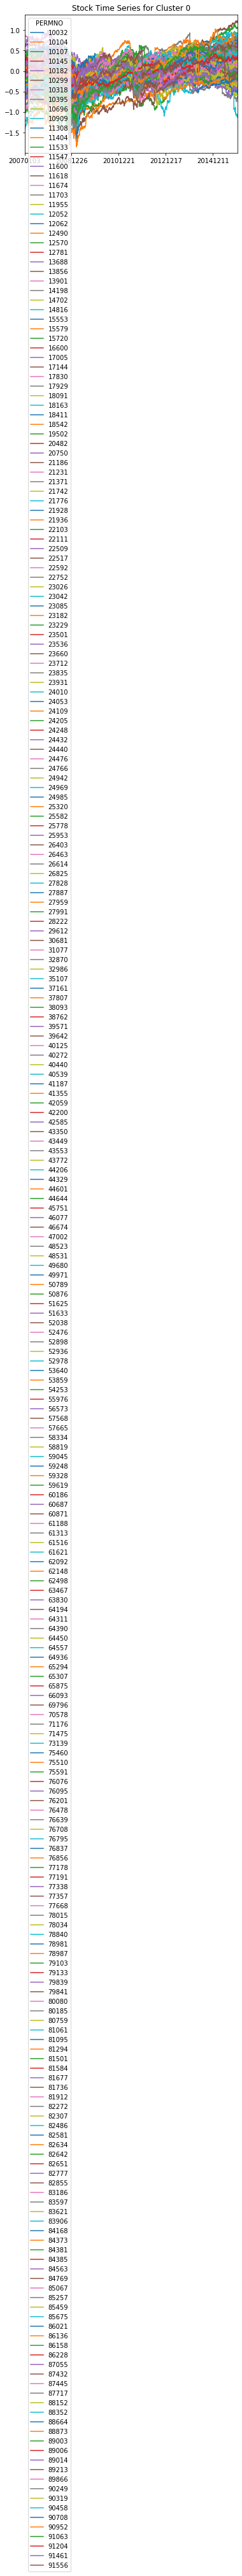

In [26]:
for c in clusters_viz_list:
    stocks = list(clustered_series[clustered_series==c].index)
    means = np.log(stock_price.loc[stocks,].T.mean())
    data = np.log(stock_price.loc[stocks,]).T.sub(means)
    data.plot(title='Stock Time Series for Cluster %d' % c)
    plt.savefig('stock_price_clsuter_'+str(c)+'.png')
    plt.show()

In [27]:
clustered_series[clustered_series == 2]

PERMNO
11850    2
14541    2
24328    2
91650    2
dtype: int64

In [28]:
def Cointegration(cluster, significance, start_day, end_day, Price):
    pair_coin = []
    p_value = []
    n = cluster.shape[0]
    keys = cluster.keys()
    for i in range(n):
        for j in range(i+1,n):
            asset_1 = Price.loc[keys[i], start_day:end_day]
            asset_2 = Price.loc[keys[j], start_day:end_day]
            results = sm.OLS(asset_1, asset_2).fit()
            predict = results.predict(asset_2)
            error = asset_1 - predict
            ADFtest = ts.adfuller(error)
            if ADFtest[1] < significance:
                pair_coin.append([keys[i], keys[j]])
                p_value.append(ADFtest[1])
    return p_value, pair_coin

In [29]:
import heapq
import operator
def PairSelection(clustered_series, significance, start_day, end_day, Price, E_selection = False):
    Opt_pairs = []   # to get best pair in cluster i
    
    if E_selection == True: # select one pair from each cluster
        for i in clusters_viz_list:
            cluster = clustered_series[clustered_series == i]
            keys = cluster.keys()
            result = Cointegration(cluster, significance, start_day, end_day, Price)
            if len(result[0]) > 0:
                if np.min(result[0]) < significance:
                    index = np.where(result[0] == np.min(result[0]))[0][0]
                    Opt_pairs.append([result[1][index][0], result[1][index][1]]) 
    else:
        p_value_contval = []
        pairs_contval = []
        for i in clusters_viz_list:
            cluster = clustered_series[clustered_series == i]
            keys = cluster.keys()
            result = Cointegration(cluster, significance, start_day, end_day, Price)
            if len(result[0]) > 0:
                p_value_contval += result[0]
                pairs_contval += result[1]
        
        Opt_pair_index = heapq.nsmallest(20, range(len(p_value_contval)), key=p_value_contval.__getitem__)
        Opt_pairs = operator.itemgetter(*Opt_pair_index)(pairs_contval)
    return Opt_pairs

In [30]:
significance = 0.05
start_date = '20100104'
end_date = "20151231"

opt_pairs = PairSelection(clustered_series, significance, start_date, end_date, stock_price)

In [31]:
print("Number of clusters: ",len(ticker_count_reduced))
print("Number of cointegrated pairs: ",len(opt_pairs))
print("Pairs with lowest p-value among all the clusters:")
opt_pairs

Number of clusters:  9
Number of cointegrated pairs:  20
Pairs with lowest p-value among all the clusters:


([48531, 64390],
 [83186, 89003],
 [81294, 82581],
 [53640, 83597],
 [43350, 82651],
 [12781, 48531],
 [44644, 90458],
 [43350, 48531],
 [40539, 81584],
 [21742, 76639],
 [51633, 58819],
 [24969, 24985],
 [66093, 77191],
 [81294, 83186],
 [42585, 83621],
 [10395, 53640],
 [23931, 48531],
 [60186, 81095],
 [11600, 43350],
 [13856, 48531])

In [35]:
significance = 0.05
start_date = '20100104'
end_date = "20151231"

opt_pairs2 = PairSelection(clustered_series, significance, start_date, end_date, stock_price, E_selection = True)
print("Number of clusters: ",len(ticker_count_reduced))
print("Number of cointegrated pairs: ",len(opt_pairs))
print("Pairs with lowest p-value among all the clusters:")
opt_pairs2

Number of clusters:  9
Number of cointegrated pairs:  20
Pairs with lowest p-value among all the clusters:


[[16548, 81577], [48531, 64390]]

In [32]:
lookup_table = pd.read_csv("./permno_ticker_lookup_table.csv", index_col = 0)
lookup_table.head()

,PERMNO,TICKER
0,10025,AEPI
1,10026,JJSF
2,10032,PLXS
3,10051,HGR
4,10051,HNGR


In [33]:
#preview of cointegrated pairs
def plot_pairs(asset1, asset2, start_date, end_date, df_price, lookup_table):
    
    price1 = df_price.loc[asset1, start_date:end_date]
    price2 = df_price.loc[asset2, start_date:end_date]
    
    tic1 = lookup_table.loc[lookup_table['PERMNO'] == asset1, 'TICKER'].values[0]
    tic2 = lookup_table.loc[lookup_table['PERMNO'] == asset2, 'TICKER'].values[0]
    
    fig = plt.figure(figsize = (10,7))
    ax = fig.add_subplot(111)

    ax.set_xlabel(tic1)
    ax.set_ylabel(tic2)
    
    ax.scatter(price1[0:252], price2[0:252], color = 'b', label = 'year 2010')
    ax.scatter(price1[252:504], price2[252:504], color = 'g', label = 'year 2011')
    ax.scatter(price1[504:756], price2[504:756], color = 'r', label = 'year 2012')
    ax.scatter(price1[756:1008], price2[756:1008], color = 'c', label = 'year 2013')
    ax.scatter(price1[1008:1260], price2[1008:1260], color = 'm', label = 'year 2014')
    ax.scatter(price1[1260:], price2[1260:], color = 'k', label = 'year 2015')
    
    ax.legend()
    plt.savefig("./stock_price_relation/"+str(tic1)+'_'+str(tic2)+'.png')
    plt.show()

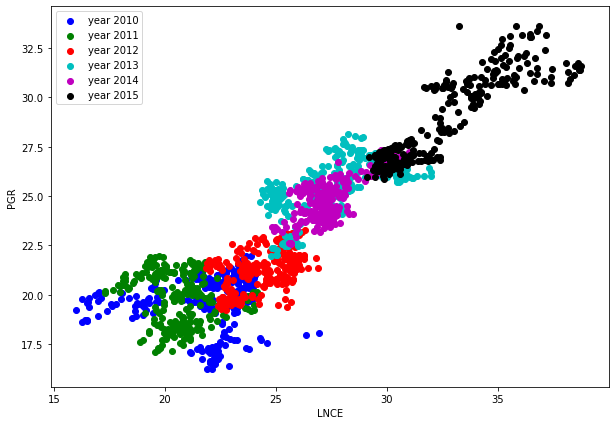

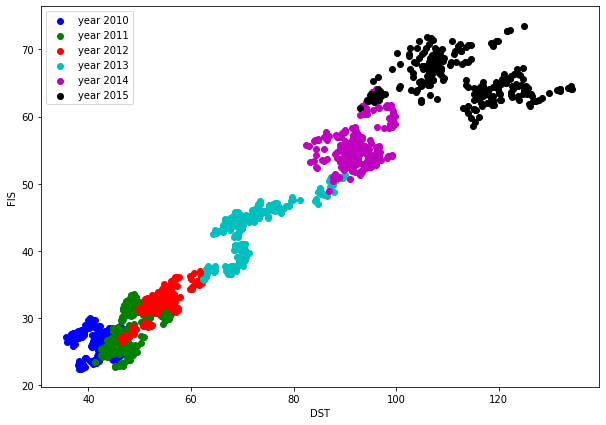

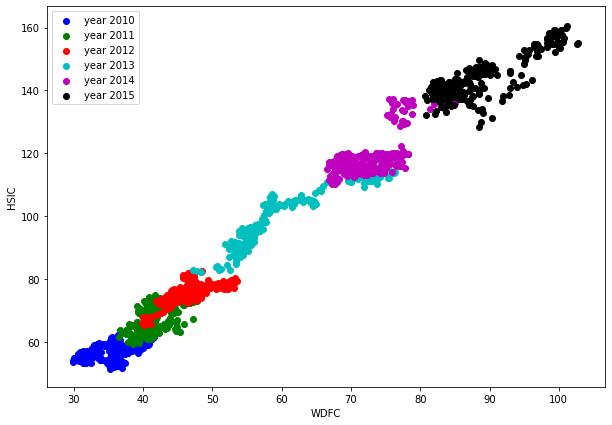

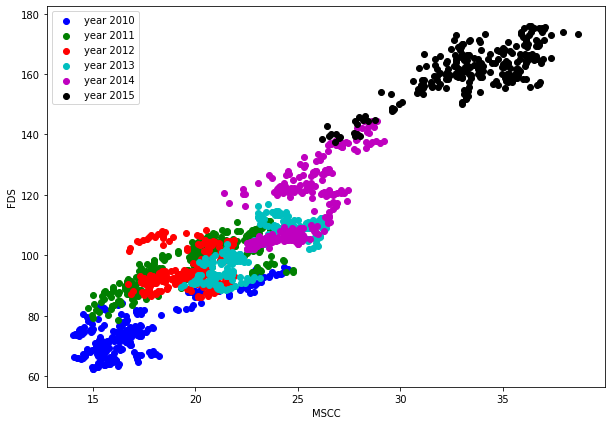

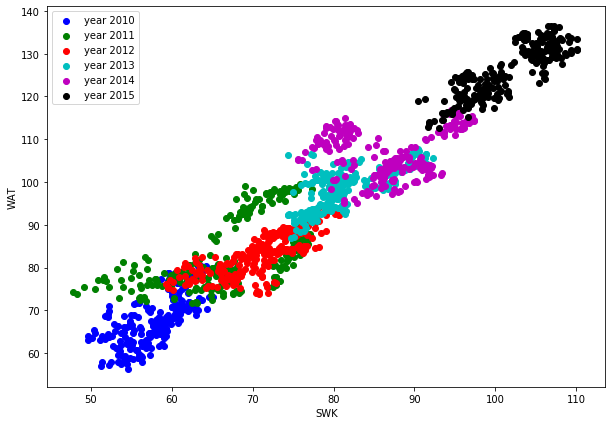

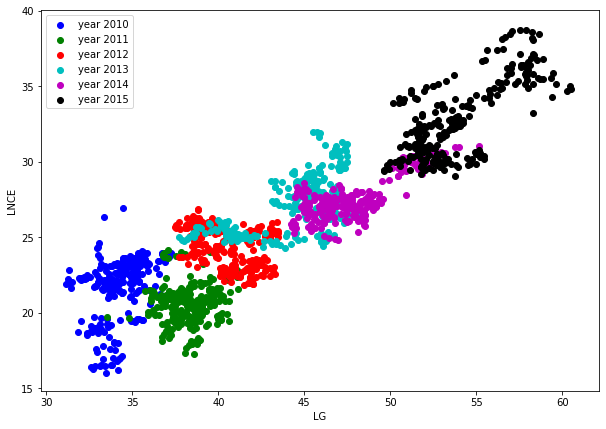

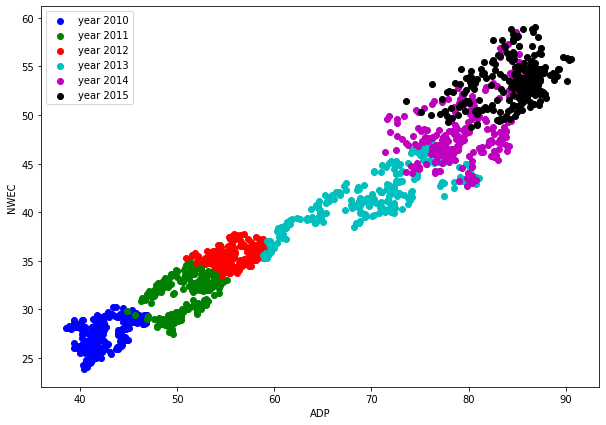

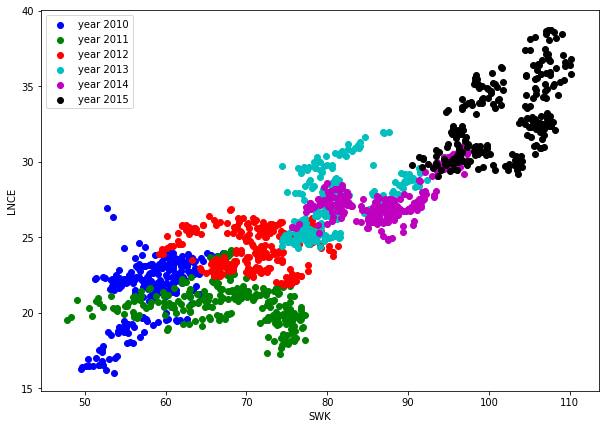

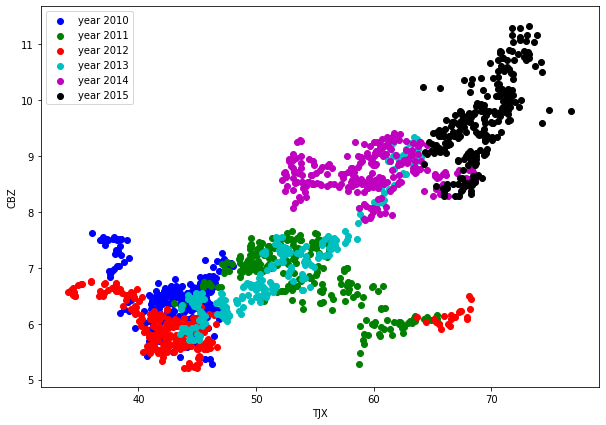

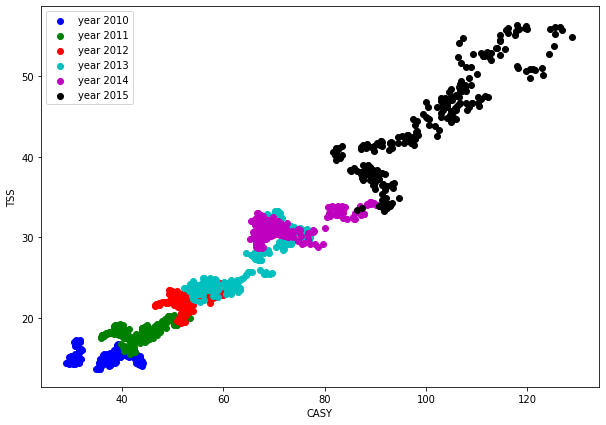

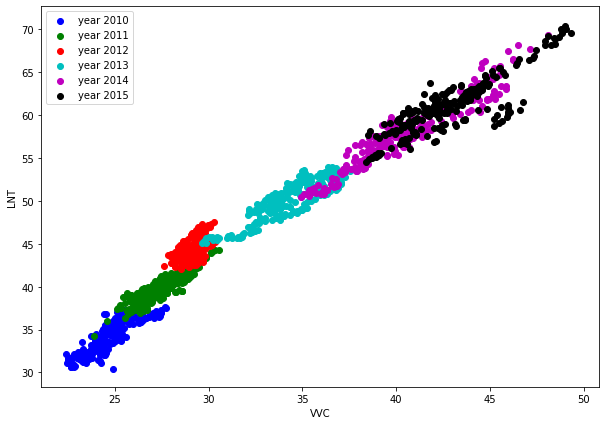

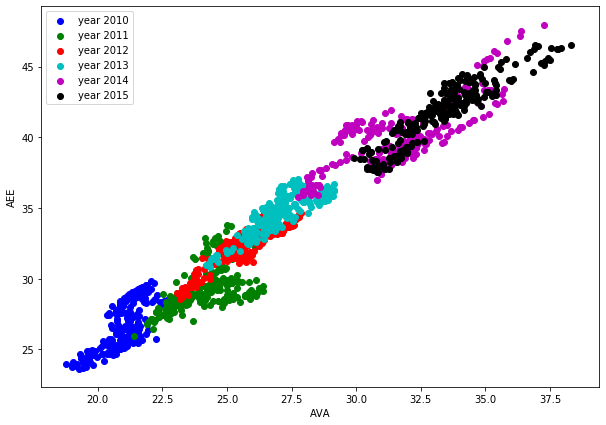

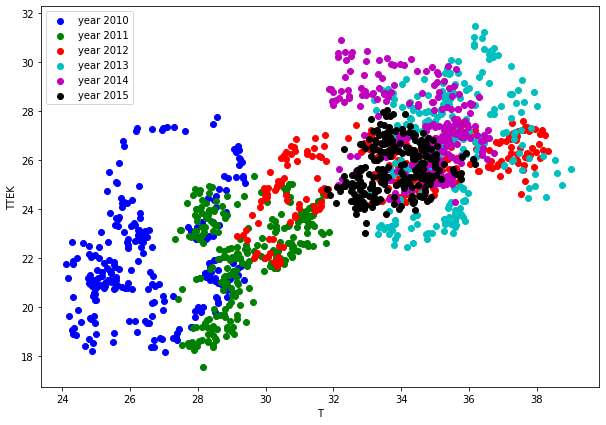

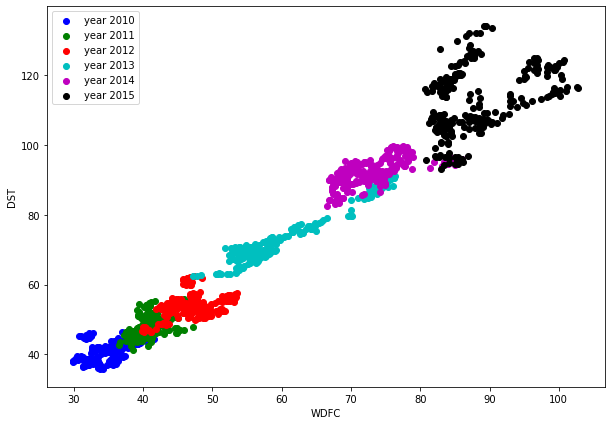

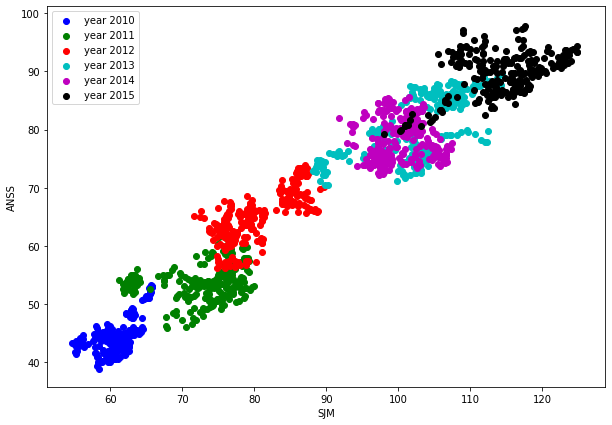

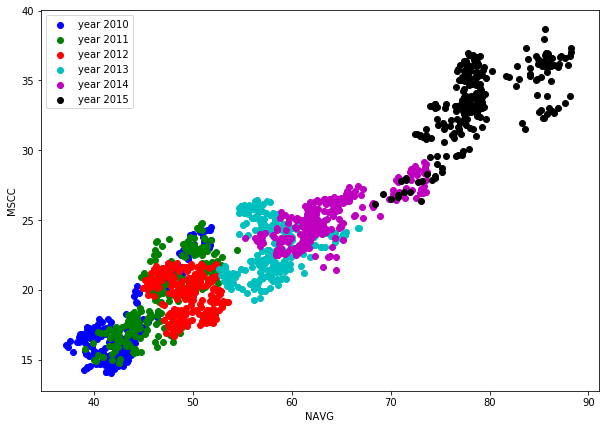

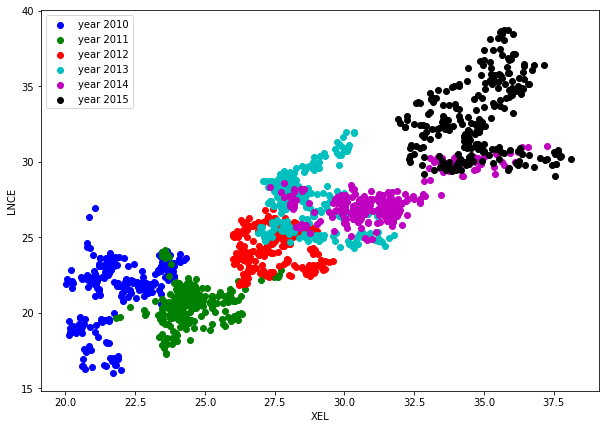

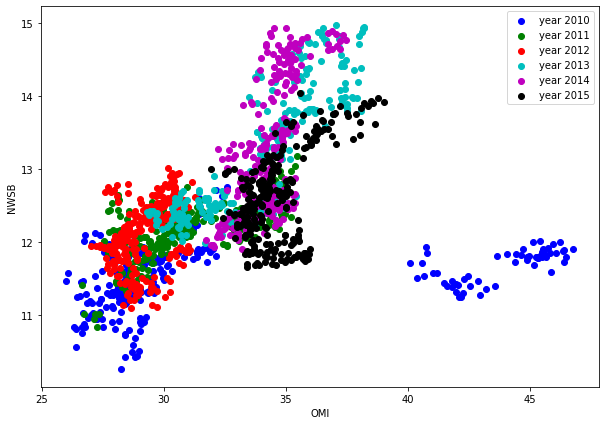

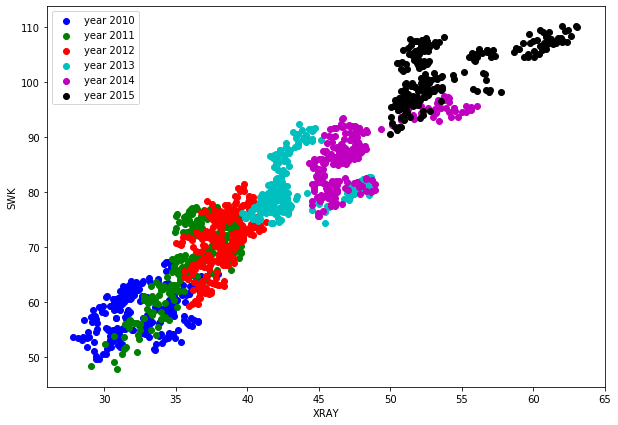

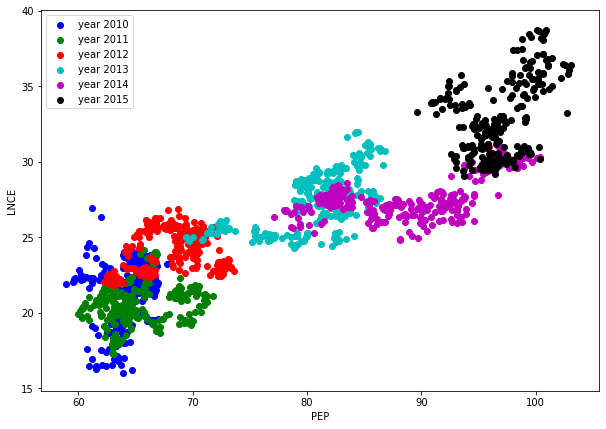

In [34]:
start_date = '20100101'
end_date = '20151231'
for pair in opt_pairs:
    asset1 = pair[0]
    asset2 = pair[1]
    plot_pairs(asset1, asset2, start_date, end_date, stock_price, lookup_table)